In [1]:
import os
import numpy as np
import pandas as pd
from collections import deque

!pip install music21
!pip install pygame

from music21 import converter, instrument, note, chord, midi, stream, meter

from keras.models import Model, Sequential
from keras.layers import *
from keras.models import load_model
import keras.backend as K
import keras.callbacks
from keras.utils import Sequence
from keras.utils import to_categorical
from keras.preprocessing.sequence import TimeseriesGenerator

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
Using TensorFlow backend.


In [78]:
# grab / parse data

In [ ]:
# X

In [178]:
x_directory = "midi/Piano_2h"
# specify the number of track in each song (should be the same, in same order, for each song)
x_tracks = (0,)
x_instru = instrument.Piano()

x_notes = [[] for track in x_tracks]
x_durations = [[] for track in x_tracks]
for i, file in enumerate(os.listdir(x_directory)):
    midi_part = converter.parse(os.path.join(x_directory, file))
    # Parse the midi file by the notes/chords it contains
    for track, _ in enumerate(x_tracks):
        notes_to_parse = midi_part[x_tracks[track]].flat.notesAndRests
        notes_to_parse.makeMeasures()
        for mes in notes_to_parse.measures(0, None):
            if isinstance(mes, stream.Measure):
                mes = mes.chordify()
                notes_mes_tab = []
                durations_mes_tab = []
                for elem in mes:    
                    if isinstance(elem, note.Note):
                        notes_mes_tab.append([str(elem.pitch)])
                    elif isinstance(elem, chord.Chord):
                        notes_mes_tab.append([str(n.nameWithOctave) for n in elem.pitches])
                    elif isinstance(elem, note.Rest):
                        notes_mes_tab.append([elem.name])
                    durations_mes_tab.append(elem.quarterLength)
                x_notes[track].append(notes_mes_tab)
                x_durations[track].append(durations_mes_tab)
    print("Song %s Loaded" % file)
print("DONE LOADING SONGS") 
# Get all notes
x_np_notes = [[] for track in x_tracks]
for track, _ in enumerate(x_tracks):
    for elem in x_notes[track]:
        x_np_notes[track] += elem
x_np_notes = [np.array(x_np_notes[track]) for track in x_tracks]
x_np_notes = [x_np_notes[track].flatten() for track in x_tracks]
x_notes_vocab = [[] for track in x_tracks]
for track, _ in enumerate(x_tracks):
    for item in x_np_notes[track]:
        if len(item) > 1 and item != "rest":
            x_notes_vocab[track].append(",".join([note for note in item]))
        else:
            x_notes_vocab[track].append(item[0])
    x_notes_vocab[track] = sorted(set(x_notes_vocab[track]))
# Get all durations
x_np_durations = [[] for track in x_tracks]
for track, _ in enumerate(x_tracks):
    for elem in x_durations[track]:
        x_np_durations[track] += elem
x_durations_vocab = [[] for track in x_tracks]
for track, _ in enumerate(x_tracks):
    x_durations_vocab[track] = sorted(set(np.array(x_np_durations[track]).flatten()))

for track, _ in enumerate(x_tracks):
    print("%s X_Notes, x_notes_Vocab : %s ; x_durations_Vocab : %s" % (len(x_notes[track]), len(x_notes_vocab[track]), len(x_durations_vocab[track])))
print(x_notes_vocab, x_notes)
print(x_durations_vocab, x_durations)

Song be_son1a.mid Loaded
Song be_son1b.mid Loaded
Song be_son1c.mid Loaded


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 1 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


Song be_son1d.mid Loaded
DONE LOADING SONGS
882 X_Notes, x_notes_Vocab : 267 ; x_durations_Vocab : 21
[['A2', 'A3', 'A3,A4', 'A3,C4', 'A3,C4,F4', 'A3,F4', 'A4', 'A4,B-4', 'A4,B-4,F5', 'A4,B4', 'A4,C#5', 'A4,C5', 'A4,C5,F5', 'A4,D5', 'A4,F5', 'A5', 'A5,B-5', 'A5,C6', 'B-3', 'B-3,B-4', 'B-3,E4', 'B-3,F4', 'B-3,G4', 'B-4', 'B-4,B-5', 'B-4,C#5', 'B-4,C#5,B-5', 'B-4,C#5,F5', 'B-4,C5', 'B-4,C5,F5', 'B-4,D5', 'B-4,E-5', 'B-4,E5', 'B-4,E5,G5,B-5', 'B-4,F5', 'B-4,G5', 'B-5', 'B-5,C6', 'B3', 'B3,B4', 'B3,C4,D4', 'B3,C4,D4,E4', 'B3,C4,D4,E4,G4', 'B3,C4,D4,F4', 'B3,C4,D4,G4', 'B3,D4', 'B3,D4,F4,G#4,B4', 'B3,F4', 'B4', 'B4,B5', 'B4,C5', 'B4,C5,D5', 'B4,C5,D5,A5,B-5', 'B4,C5,D5,E5', 'B4,C5,D5,F5', 'B4,C5,D5,G5', 'B4,C5,F#5', 'B4,D5,F5,G#5,B5', 'B4,D5,G5,B5', 'B4,E5', 'B4,E5,F5', 'B4,F#5', 'B4,F5', 'B4,F5,G5', 'B4,G5', 'B5', 'B5,C6', 'B5,D6', 'C#4', 'C#4,B-4', 'C#4,C#5', 'C#4,E-4,G4', 'C#4,E-4,G4,B-4', 'C#4,E-4,G4,C#5', 'C#4,F4', 'C#4,G4', 'C#5', 'C#5,B-5', 'C#5,C#6', 'C#5,C6', 'C#5,D5', 'C#5,E-5', '

In [179]:
# Y

In [180]:
y_directory = "midi/Piano_2h"
# specify the number of track in each song (should be the same, in same order, for each song)
y_tracks = (1,)
y_instru = instrument.Piano()

y_notes = [[] for track in y_tracks]
y_durations = [[] for track in y_tracks]

for i, file in enumerate(os.listdir(y_directory)):
    midi_part = converter.parse(os.path.join(y_directory, file))
    # Parse the midi file by the notes/chords it contains
    for track, _ in enumerate(y_tracks):
        notes_to_parse = midi_part[y_tracks[track]].flat.notesAndRests
        notes_to_parse.makeMeasures()
        for mes in notes_to_parse.measures(0, None):
            if isinstance(mes, stream.Measure):
                mes = mes.chordify()
                notes_mes_tab = []
                durations_mes_tab = []
                for elem in mes:    
                    if isinstance(elem, note.Note):
                        notes_mes_tab.append([str(elem.pitch)])
                    elif isinstance(elem, chord.Chord):
                        notes_mes_tab.append([str(n.nameWithOctave) for n in elem.pitches])
                    elif isinstance(elem, note.Rest):
                        notes_mes_tab.append([elem.name])
                    durations_mes_tab.append(elem.quarterLength)
                y_notes[track].append(notes_mes_tab)
                y_durations[track].append(durations_mes_tab)
    print("Song %s Loaded" % file)
print("DONE LOADING SONGS") 
# Get all notes
y_np_notes = [[] for track in y_tracks]
for track, _ in enumerate(y_tracks):
    for elem in y_notes[track]:
        y_np_notes[track] += elem
y_np_notes = [np.array(y_np_notes[track]) for track, _ in enumerate(y_tracks)]
y_np_notes = [y_np_notes[track].flatten() for track, _ in enumerate(y_tracks)]
y_notes_vocab = [[] for track in y_tracks]
for track, _ in enumerate(y_tracks):
    for item in y_np_notes[track]:
        if len(item) > 1 and item != "rest":
            y_notes_vocab[track].append(",".join([note for note in item]))
        else:
            y_notes_vocab[track].append(item[0])
    y_notes_vocab[track] = sorted(set(y_notes_vocab[track]))
# Get all durations
y_np_durations = [[] for track in y_tracks]
for track, _ in enumerate(y_tracks):
    for elem in y_durations[track]:
        y_np_durations[track] += elem
y_durations_vocab = [[] for track in y_tracks]
for track, _ in enumerate(y_tracks):
    y_durations_vocab[track] = sorted(set(np.array(y_np_durations[track]).flatten()))

for track, _ in enumerate(y_tracks):
    print("%s Y_Notes, y_notes_Vocab : %s ; y_durations_Vocab : %s" % (len(y_notes[track]), len(y_notes_vocab[track]), len(y_durations_vocab[track])))
print(y_notes_vocab, y_notes)
print(y_durations_vocab, y_durations)

Song be_son1a.mid Loaded


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 16 of 
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


Song be_son1b.mid Loaded
Song be_son1c.mid Loaded
Song be_son1d.mid Loaded
DONE LOADING SONGS
882 Y_Notes, y_notes_Vocab : 252 ; y_durations_Vocab : 19
[['A1', 'A2', 'A2,A3', 'A2,B-2', 'A2,F3', 'A3', 'A3,B-3', 'A3,C4', 'A3,C4,F4', 'A3,F4', 'A4', 'B-1', 'B-2', 'B-2,C#3', 'B-2,C#3,E-3,G3', 'B-2,C#3,F3', 'B-2,C#3,G3', 'B-2,C#3,G3,B-3', 'B-2,C3', 'B-2,D3', 'B-3', 'B-3,B-4', 'B-3,C#4', 'B-3,C#4,E-4', 'B-3,C#4,F4', 'B-3,C#4,G4', 'B-3,C4', 'B-3,C4,G4', 'B-3,D4', 'B-3,D4,G4', 'B-3,E-4', 'B-3,E-4,G4', 'B-3,E4', 'B-3,F4', 'B-3,G4', 'B-4', 'B-4,D5', 'B1', 'B2', 'B2,B3', 'B2,C3', 'B2,D3,G3', 'B3', 'B3,C4', 'B3,D4', 'B3,D4,F4', 'B3,D4,G#4', 'B3,E-4', 'B4,C5', 'C#2', 'C#3', 'C#3,B-3', 'C#3,C#4', 'C#3,F3', 'C#3,F3,B-3', 'C#3,F3,G#3', 'C#3,F3,G#3,B3', 'C#4', 'C#4,B-4', 'C#4,E-4,B-4', 'C#4,E4', 'C#4,F4', 'C#4,F4,B-4', 'C#4,F4,G#4,B4', 'C#4,G#4', 'C#5', 'C2', 'C2,C3', 'C3', 'C3,A3', 'C3,B-3', 'C3,B3', 'C3,C4', 'C3,E-3', 'C3,E-3,F3', 'C3,E3', 'C3,E3,B-3', 'C3,E3,G3,C4', 'C3,F#3,G#3', 'C3,F3', 'C3,F3,G#3,

In [182]:
maxLen = 0
for track, _ in enumerate(x_tracks):
    currMax = max(len(elem) for elem in x_notes[track])
    if currMax > maxLen:
        maxLen = currMax
for track, _ in enumerate(x_tracks):
    currMax = max(len(elem) for elem in x_durations[track])
    if currMax > maxLen:
        maxLen = currMax
for track, _ in enumerate(y_tracks):
    currMax = max(len(elem) for elem in y_notes[track])
    if currMax > maxLen:
        maxLen = currMax
for track, _ in enumerate(y_tracks):
    currMax = max(len(elem) for elem in y_durations[track])
    if currMax > maxLen:
        maxLen = currMax
        
print(maxLen)

32


In [183]:
x_cat_notes = [[] for track in x_tracks]
x_cat_durations = [[] for track in x_tracks]

for track, _ in enumerate(x_tracks):
    cat_tab = []
    for mes in x_notes[track]:
        for elem in mes:
            int_note = x_notes_vocab[track].index(",".join(elem))
            cat = np.zeros((len(x_notes_vocab[track])))
            cat[int_note] = 1
            cat_tab.append(cat)
        if len(cat_tab) < maxLen:
            for i in range(maxLen - len(cat_tab)):
                cat_tab.append(0)
        x_cat_notes[track].append(cat_tab)
    cat_tab = []
    for mes in x_durations[track]:
        for elem in mes:
            int_duration = x_durations_vocab[track].index(elem)
            cat = np.zeros((len(x_durations_vocab[track])))
            cat[int_duration] = 1
            cat_tab.append(cat)
        if len(cat_tab) < maxLen:
            for i in range(maxLen - len(cat_tab)):
                cat_tab.append(0)
        x_cat_durations[track].append(cat_tab)
# merge
x = [x_cat_notes, x_cat_durations]

In [184]:
y_cat_notes = [[] for track in y_tracks]
y_cat_durations = [[] for track in y_tracks]

for track, _ in enumerate(y_tracks):
    cat_tab = []
    for mes in y_notes[track]:
        for elem in mes:
            int_note = y_notes_vocab[track].index(",".join(elem))
            cat = np.zeros((len(y_notes_vocab[track])))
            cat[int_note] = 1
            cat_tab.append(cat)
        if len(cat_tab) < maxLen:
            for i in range(maxLen - len(cat_tab)):
                cat_tab.append(0)
        y_cat_notes[track].append(cat_tab)
    cat_tab = []
    for mes in y_durations[track]:
        for elem in mes:
            int_duration = y_durations_vocab[track].index(elem)
            cat = np.zeros((len(y_durations_vocab[track])))
            cat[int_duration] = 1
            cat_tab.append(cat)
        if len(cat_tab) < maxLen:
            for i in range(maxLen - len(cat_tab)):
                cat_tab.append(0)
        y_cat_durations[track].append(cat_tab)
# merge
y = [y_cat_notes, y_cat_durations]

In [82]:
# Build generator

In [185]:
seq_len = 1
batch_size = 32
#split = int(0.8 * len(x))

class dataGenerator(Sequence):
    def __init__(self, x, y, batch_size):
        self.batch_size = batch_size
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x[0][0]) // self.batch_size - 1
    def __getitem__(self, idx):
        X_note = [[] for track in x_tracks]
        X_duration = [[] for track in x_tracks]
        Y_note = [[] for track in y_tracks]
        Y_duration = [[] for track in y_tracks]
        res = [[], []]
        for track, _ in enumerate(x_tracks):
            for i in range(self.batch_size):
                X_note[track].append(self.x[0][track][idx+i : idx+i + seq_len])
                X_duration[track].append(self.x[1][track][idx+i : idx+i + seq_len])
                Y_note[track].append(self.y[0][track][idx+i : idx+i + seq_len])
                Y_duration[track].append(self.y[1][track][idx+i : idx+i + seq_len])
            X_note[track] = np.array(X_note[track])
            X_duration[track] = np.array(X_duration[track])
            Y_note[track] = np.array(Y_note[track])
            Y_duration[track] = np.array(Y_duration[track])
            res[0].append(X_note[track])
            res[0].append(X_duration[track])
            res[1].append(Y_note[track])
            res[1].append(Y_duration[track])
        return res
data_gen = dataGenerator(x, y, batch_size)

In [186]:
# Build Model

In [114]:
K.clear_session()

in_note = Input(shape=(seq_len, len(x_notes_vocab[track])))
x1, states_h_1, states_c_1 = LSTM(32, return_state=True)(in_note)

in_duration = Input(shape=(seq_len, len(x_durations_vocab[track])))
x2, states_h_2, states_c_2 = LSTM(32, return_state=True)(in_duration)


decoder_note_input = Input(shape=(seq_len, len(y_notes_vocab[track])))
out_note, _, _ = LSTM(32, return_sequences=True, return_state=True)(decoder_note_input, initial_state=[states_h_1, states_c_1])
out_note = Dense(len(y_notes_vocab[track]), activation="softmax")(out_note)

decoder_duration_input = Input(shape=(seq_len, len(y_notes_vocab[track])))
out_duration, _, _ = LSTM(32, return_sequences=True, return_state=True)(decoder_duration_input, initial_state=[states_h_2, states_c_2])
out_duration = Dense(len(y_notes_vocab[track]), activation="softmax")(out_duration)


model = Model(inputs=[], outputs=[])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

TypeError: unhashable type: 'list'

In [51]:
#save best model if model improved
model_name = "Piano_2h.h5"
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [54]:
h = model.fit_generator(data_gen, epochs = 10, callbacks=[best_checkpoint])

Epoch 1/10
154/154 [==============================] - 9s 60ms/step - loss: 0.4936 - dense_2_loss: 0.3939 - dense_3_loss: 0.0997 - dense_2_acc: 0.9294 - dense_3_acc: 0.9655
Epoch 2/10
154/154 [==============================] - 8s 55ms/step - loss: 0.3433 - dense_2_loss: 0.2645 - dense_3_loss: 0.0788 - dense_2_acc: 0.9651 - dense_3_acc: 0.9763
Epoch 3/10
154/154 [==============================] - 9s 57ms/step - loss: 0.5279 - dense_2_loss: 0.3919 - dense_3_loss: 0.1360 - dense_2_acc: 0.9075 - dense_3_acc: 0.9543
Epoch 4/10
154/154 [==============================] - 9s 59ms/step - loss: 0.1919 - dense_2_loss: 0.1440 - dense_3_loss: 0.0479 - dense_2_acc: 0.9901 - dense_3_acc: 0.9961
Epoch 5/10
154/154 [==============================] - 10s 63ms/step - loss: 0.1315 - dense_2_loss: 0.1001 - dense_3_loss: 0.0313 - dense_2_acc: 0.9953 - dense_3_acc: 0.9996
Epoch 6/10
154/154 [==============================] - 10s 64ms/step - loss: 0.1452 - dense_2_loss: 0.1075 - dense_3_loss: 0.0377 - dense_2_

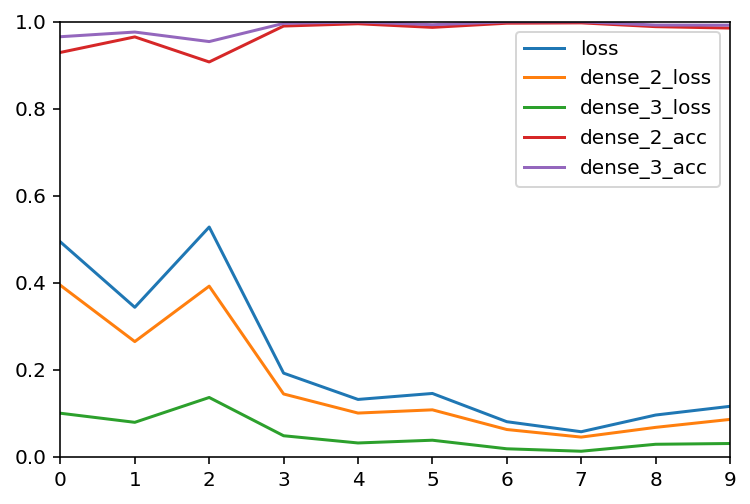

In [55]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [ ]:
# Load / save

In [56]:
model_name = "Piano_2h.h5"
model.save(model_name)
#model = load_model(model_name)

In [69]:
# Test

In [87]:
# Build seed
idx = 4287
x_test, _ = data_gen[idx]
x_test = [x_test[i][0] for i in range(len(x_test))]
x_test_stream = [stream.Stream() for track in x_tracks]

for track, _ in enumerate(x_tracks):
    for i in range(end-start):
        str_note = x_notes_vocab[track][np.argmax(x_test[2*track][i])]
        duration = x_durations_vocab[track][np.argmax(x_test[2*track+1][i])]
        if len(str_note.split(",")) > 1:
            x_chord = chord.Chord(str_note.split(","))
            x_chord.quarterLength = duration
            x_test_stream[track].append(x_chord)
        else:
            if str_note != "rest":
                x_note = note.Note(str_note)
                x_note.quarterLength = duration
                x_test_stream[track].append(x_note)
            else:
                x_rest = note.Rest()
                x_rest.quarterLength = duration
                x_test_stream[track].append(x_rest)
    x_test_stream[track].insert(0, x_instru)

In [92]:
# make seq_len predictions from seed
preds = [[] for track in y_tracks]
x = x_test

for _ in range(seq_len):
    pred = model.predict([np.array([x[i]]) for i in range(len(x))])
    y_note = [pred[i] for i in range(0, len(pred), 2)]
    y_duration = [pred[i] for i in range(1, len(pred), 2)]
    for track, _ in enumerate(y_tracks):
        cat_note = np.zeros((len(y_notes_vocab[track])))
        y_note[track] = np.argmax(y_note[track])
        cat_note[y_note[track]] = 1
        cat_duration = np.zeros((len(y_durations_vocab[track])))
        y_duration[track] = np.argmax(y_duration[track])
        cat_duration[y_duration[track]] = 1
        preds[track].append((cat_note, cat_duration))

In [93]:
# Build predicted stream
y_test_stream = [stream.Stream() for track in y_tracks]

for track, _ in enumerate(y_tracks):
    for i in range(len(preds[track])):
        str_note = y_notes_vocab[track][np.argmax(preds[track][i][0])]
        duration = y_durations_vocab[track][np.argmax(preds[track][i][1])]
        if len(str_note.split(",")) > 1:
            y_chord = chord.Chord(str_note.split(","))
            y_chord.quarterLength = duration
            y_test_stream[track].append(y_chord)
        else:
            if str_note != "rest":
                y_note = note.Note(str_note)
                y_note.quarterLength = duration
                y_test_stream[track].append(y_note)
            else:
                y_rest = note.Rest()
                y_rest.quarterLength = duration
                y_test_stream[track].append(y_rest)
    y_test_stream[track].insert(0, y_instru)

In [94]:
# play seed
x_full_score = stream.Score()
for track, _ in enumerate(x_tracks):
    p = stream.Part()
    p.append(x_test_stream[track])
    x_full_score.insert(0, p)
#x_full_score.show()
x_full_score.chordify()
x_full_score.write("midi", "x_test.mid")
sp = midi.realtime.StreamPlayer(x_full_score)
sp.play()

In [95]:
# play generated music
y_full_score = stream.Score()
for track, _ in enumerate(y_tracks):
    p = stream.Part()
    p.append(y_test_stream[track])
    y_full_score.insert(0, p)
#y_full_score.show()
y_full_score.chordify()
y_full_score.write("midi", "x_test.mid")
sp = midi.realtime.StreamPlayer(y_full_score)
sp.play()